# Exploratory Data Analysis (EDA) and Sales Forecasting - Global Superstore Dataset

by : Jonathan Sebastian Moiras

# Background

Retail businesses generate large amounts of transactional data every day, covering details about customers, products, sales, discount, shipping, profit across all regions. Analyzing this data is essential to understand which products drive the most revenue, how customers behave across different segments, and which strategies can improve overall business performance.

This dataset, taken from Kaggle (https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset), provides a great opportunity to explore sales trends, product categories, customer segmentation, and regional performance. 

By performing EDA, we can uncover valuable insights that help in making better decisions for marketing, sales, and operations. 

# Business Goals

Exploratory Data Analysis
- Understand customer behavior
- Identify profitable products & categories
- Evaluate discount impact
- Analyze insights across regions

Forecasting: Sales prediction for the next 7 days
Purpose:
- Maximize profits by increasing the stocks
- Support sales strategy with data-driven insights
- Allocate resources based on predicted demand

# Data Collection

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
SEED_VALUE=123
random.seed(SEED_VALUE) 
np.random.seed(SEED_VALUE)

In [51]:
df = pd.read_csv("SuperStoreOrders.csv");df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


# Data Understanding

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Features:
- order_id: ids of all orders
- order_date: dates for all the orders
- ship_date: shipping date of all the orders
- ship_mode: shipping mode of all the orders
- customer_name: customer names of all the order ids
- segment: segment of all the orders
- state: state of the order id
- country: country of the order id
- market: market of the order id
- region: region of the order id
- product_id: product id all of orders
- category: category of the orders
- sub_category: sub-category of the orders
- product_name: product name of the orders
- sales: sales of the orders
- quantity: quantity of the orders
- discount: discount of the orders
- profit: profit of the orders
- shipping_cost: shipping cost of the orders
- order_priority: order priority of the orders
- year: year of the orders

# Exploratory data analysis

## 1. Data types
   

In [53]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

Convert Order Date and Ship Date data types to datetime

In [54]:
date_col = ["order_date", "ship_date"]
for i in date_col:
    df[i] = pd.to_datetime(df[i], dayfirst=True)

Convert Sales to integer

Before converting, save the original sales column.
I am going to use the coerce method since there might be a categorical value

In [55]:
df["sales_original"] = df["sales"]

In [56]:
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")

In [57]:
invalid_rows = df[df["sales"].isna()]

In [58]:
df["sales"].isna().sum()

2630

In [59]:
invalid_rows[["sales", "sales_original"]]

,sales,sales_original
27,NaN,"1,648"
43,NaN,"3,029"
58,NaN,"2,574"
83,NaN,"2,479"
84,NaN,"2,174"
...,...,...
51151,NaN,"1,831"
51152,NaN,"1,208"
51228,NaN,"1,264"
51229,NaN,"1,091"


It turns out there are commas (,) in some rows that caused the data type to become an object.
Therefore, we need to trim the commas (,).

In [60]:
df["sales"] = df["sales_original"].str.replace(",", "", regex=False)

Re-check the missing values in sales column

In [61]:
df["sales"].isna().sum()

0

re-convert the data

In [62]:
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")

In [63]:
df = df.drop(columns="sales_original")

After converting data types

In [64]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                      int64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

Create a numerical & categorical list

In [65]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.difference(["year"])
categoric_cols = df.select_dtypes(include=["object"]).columns.difference(["order_id", "product_id"])

In [66]:
numeric_cols

Index(['discount', 'profit', 'quantity', 'sales', 'shipping_cost'], dtype='object')

In [67]:
categoric_cols

Index(['category', 'country', 'customer_name', 'market', 'order_priority',
       'product_name', 'region', 'segment', 'ship_mode', 'state',
       'sub_category'],
      dtype='object')

## 2. Statistical summary

In [68]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


Insights from the Summary Statistics
1. The maximum quantity purchased in a single transaction line is 14 items, indicating bulk purchases by a customer
2. The highest discount applied is 85%, which suggests heavy clearance sales or aggressive promotional campaigns
3. Profit ranges widely, with a maximum profit of about 8399 dollars, but also a minimum of -6500 dollars, showing that certain transactions resulted in significant losses
4. The most expensive shipping cost recorded is around 933 dollars, which may indicate large, heavy items or long-distance deliveries (possibly cross-country or international)
5. On average, customers purchase about 3–4 items per order line, with typical discounts around 14%, reflecting moderate price reductions in most cases
6. The median profit per line item is only around 9 dollars, suggesting that while some transactions are highly profitable, many others generate only modest returns

## 3. Check for missing values and duplicate values

In [69]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [70]:
df.duplicated().sum()

0

After checking the dataset, there are no missing values and no duplicate records.

## 4. Outlier

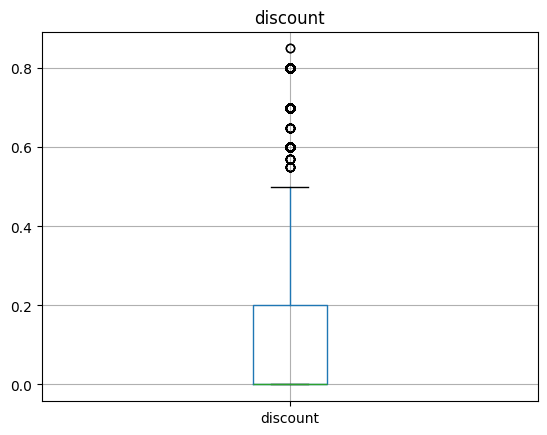

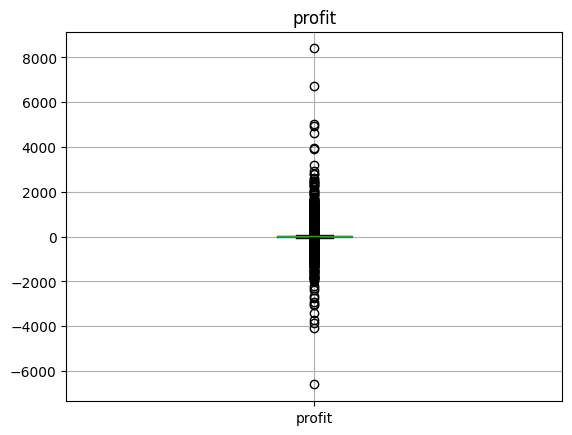

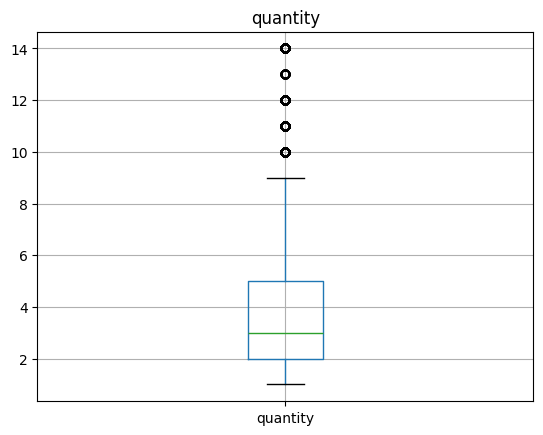

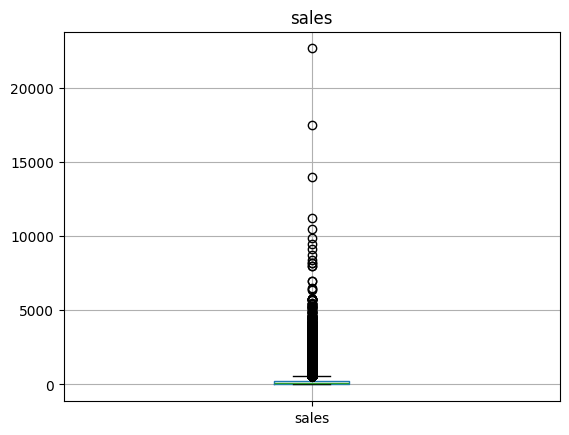

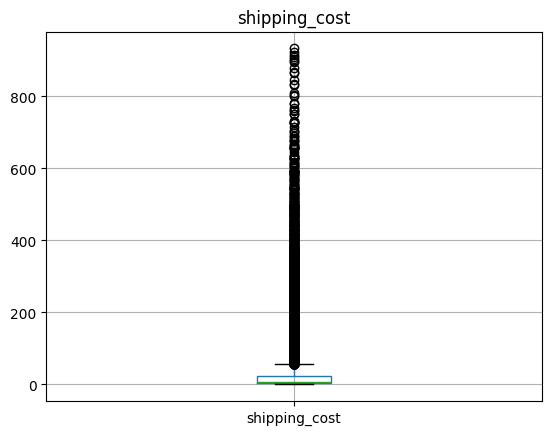

In [71]:
for col in numeric_cols:
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

From the boxplot analysis of numerical variables, there are several insights i can get
1. Discounts are usually small but can reach above 50% even up to 85%, likely during aggresive promotions, which can lead to losses
2. Profit shows both very high positive values (up to 8000) and significant losses (down 6500), indicating that heavy discounts or high costs sometimes drive negative profit
3. Quantity per order typically ranges between 2-5, but can reach up to 14 in bulk purchases
4. Sales values are highly skewed, with most transactions having relatively low amounts while a small number of transactions reach up to 22.000. 
5. Shipping cost is usually low, though some deliveries cost nearly 1000, which may be due to international or heavy item shipments

## 5. Categorical columns distribution

In [72]:
for col in categoric_cols:
    print(df[col].value_counts())
    print("")

Office Supplies    31273
Technology         10141
Furniture           9876
Name: category, dtype: int64

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Burundi             2
Chad                2
Eritrea             2
Bahrain             2
South Sudan         2
Name: country, Length: 147, dtype: int64

Muhammed Yedwab        108
Steven Ward            106
Patrick O'Brill        102
Bill Eplett            102
Gary Hwang             102
                      ... 
Catherine Glotzbach     35
David Bremer            34
Nicole Brennan          31
Darren Budd             31
Michael Oakman          29
Name: customer_name, Length: 795, dtype: int64

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: market, dtype: int64

Medium      29433
High        15501
Critical     3932
Low          2424
Name: order_priority, dtype: int64

Staples           

Visualization

Category Distribution

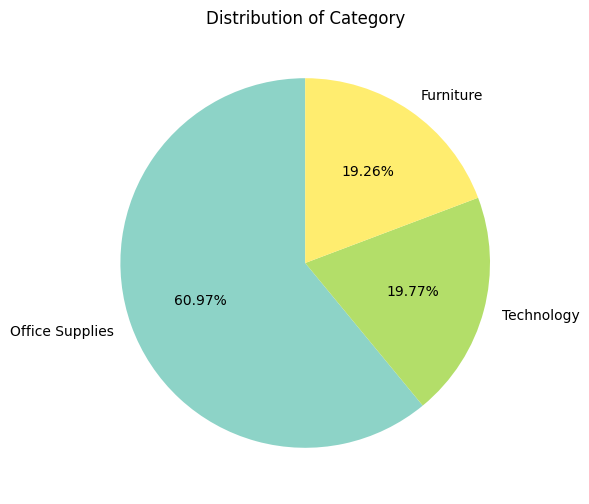

In [73]:
df["category"].value_counts().plot.pie(
    autopct="%.2f%%",
    figsize=(6,6),
    startangle=90,
    colormap="Set3"
)
plt.ylabel("")
plt.title("Distribution of Category")
plt.show()

Country Distribution

Since the dataset includes many countries, we will focus on the top-10 countries

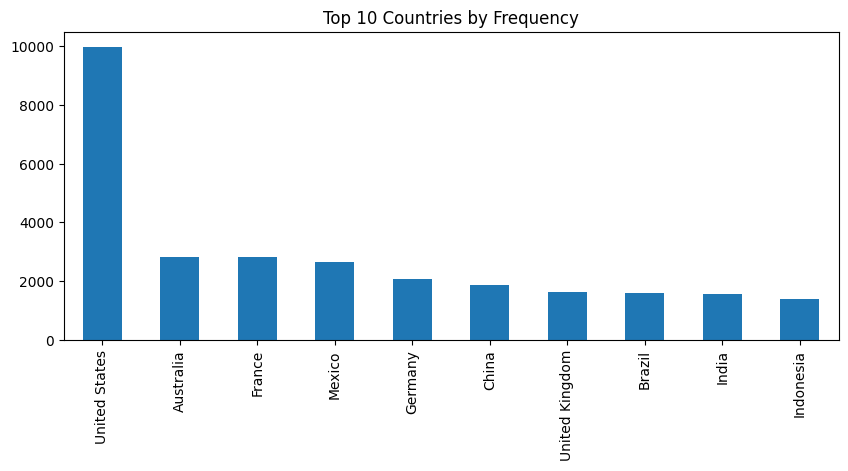

In [74]:
country_counts = df["country"].value_counts()
country_counts.head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 Countries by Frequency")
plt.show()

Market Distribution

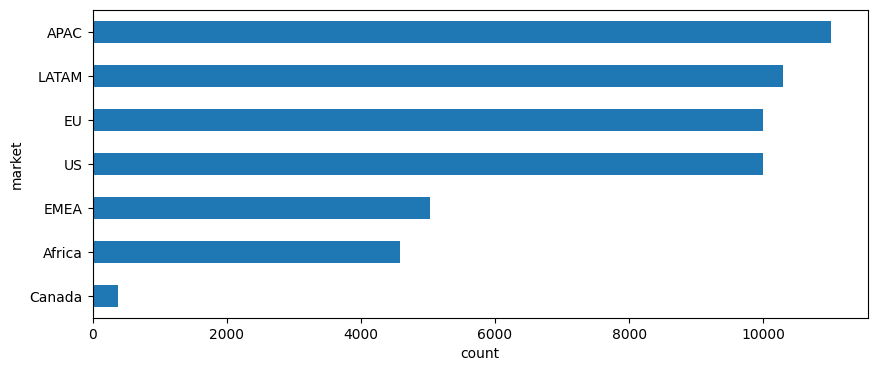

In [75]:
df["market"].value_counts().head(10).plot(kind="barh", figsize=(10,4))
plt.xlabel("count")
plt.ylabel("market")
plt.gca().invert_yaxis()  
plt.show()

order priority distribution

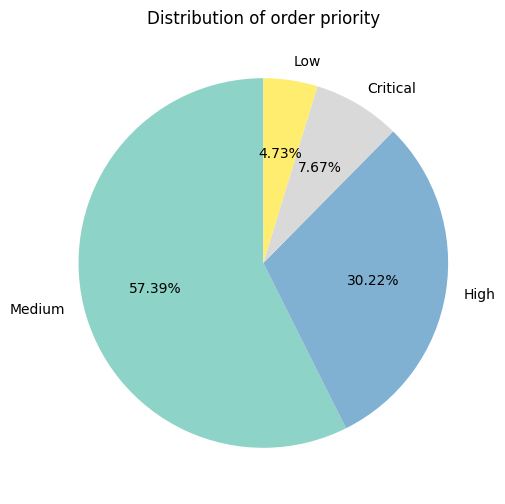

In [76]:
df["order_priority"].value_counts().plot.pie(
    autopct="%.2f%%",
    figsize=(6,6),
    startangle=90,
    colormap="Set3"
)
plt.ylabel("")
plt.title("Distribution of order priority")
plt.show()

Product Name Distribution

Show the top 10 product name, since there are a lot of products

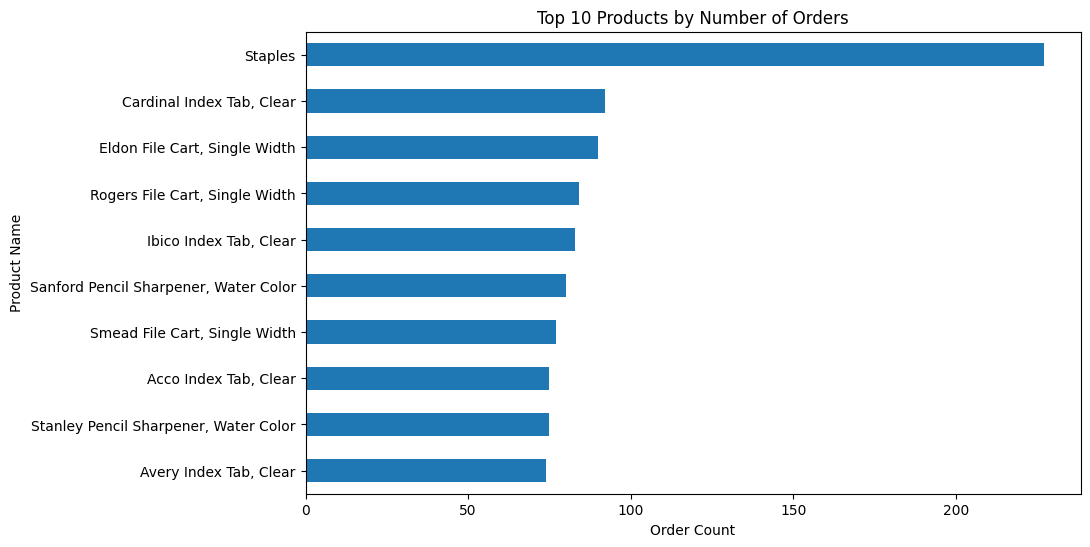

In [77]:
df["product_name"].value_counts().head(10).plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Products by Number of Orders")
plt.xlabel("Order Count")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  
plt.show()

Region Distribution

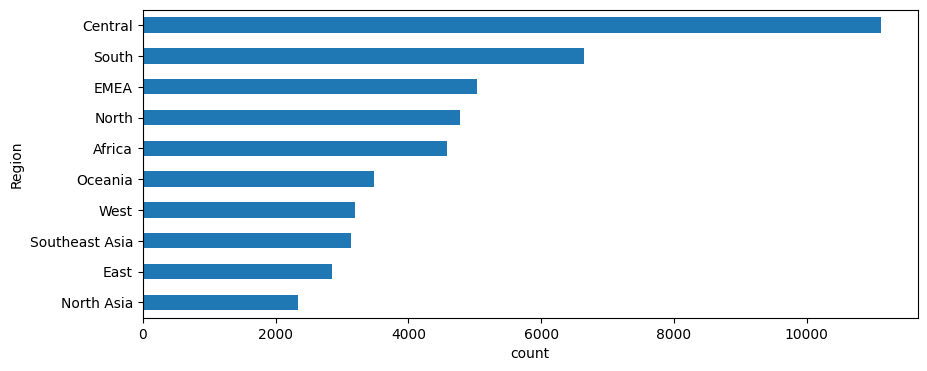

In [78]:
df["region"].value_counts().head(10).plot(kind="barh", figsize=(10,4))
plt.xlabel("count")
plt.ylabel("Region")
plt.gca().invert_yaxis()  
plt.show()

Segment Distribution

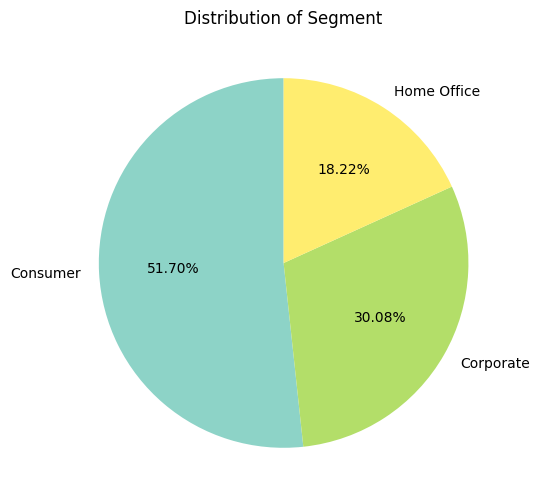

In [79]:
df["segment"].value_counts().plot.pie(
    autopct="%.2f%%",
    figsize=(6,6),
    startangle=90,
    colormap="Set3"
)
plt.ylabel("")
plt.title("Distribution of Segment")
plt.show()

Shipment mode Distribution

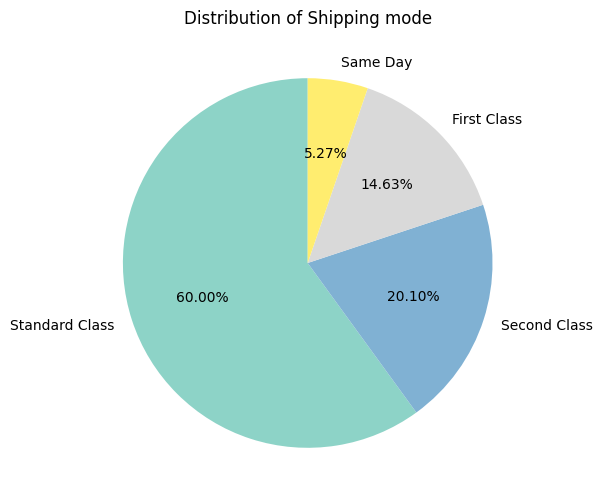

In [80]:
df["ship_mode"].value_counts().plot.pie(
    autopct="%.2f%%",
    figsize=(6,6),
    startangle=90,
    colormap="Set3"
)
plt.ylabel("")
plt.title("Distribution of Shipping mode")
plt.show()

State distribution

Show the top 10 State, since there are a lot of states

In [81]:
state_counts = df["state"].value_counts()

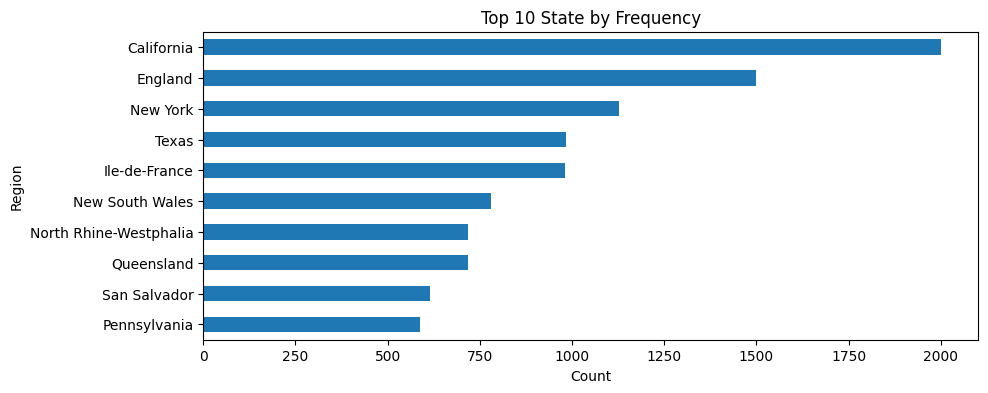

In [82]:
state_counts.head(10).plot(kind="barh", figsize=(10,4))
plt.title("Top 10 State by Frequency")
plt.xlabel("Count")
plt.ylabel("Region")
plt.gca().invert_yaxis() 
plt.show()

Sub-category distribution

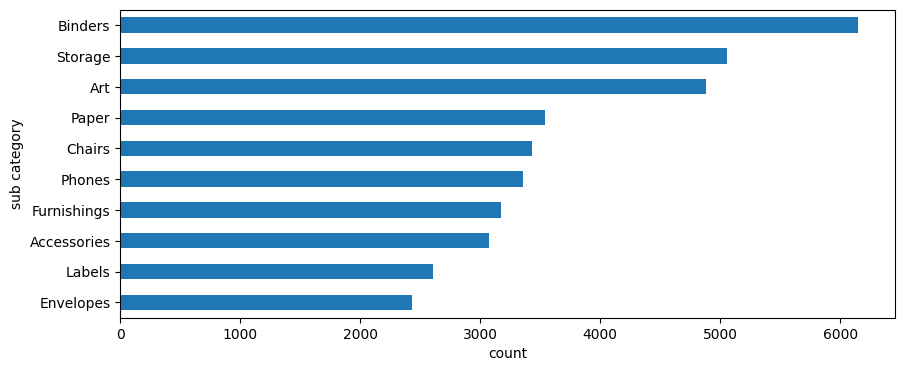

In [83]:
df["sub_category"].value_counts().head(10).plot(kind="barh", figsize=(10,4))
plt.xlabel("count")
plt.ylabel("sub category")
plt.gca().invert_yaxis()  
plt.show()

## 6. Numerical Column distribution

Discrete columns

In [84]:
continuous_col = ["shipping_cost", "sales", "discount", "profit"]

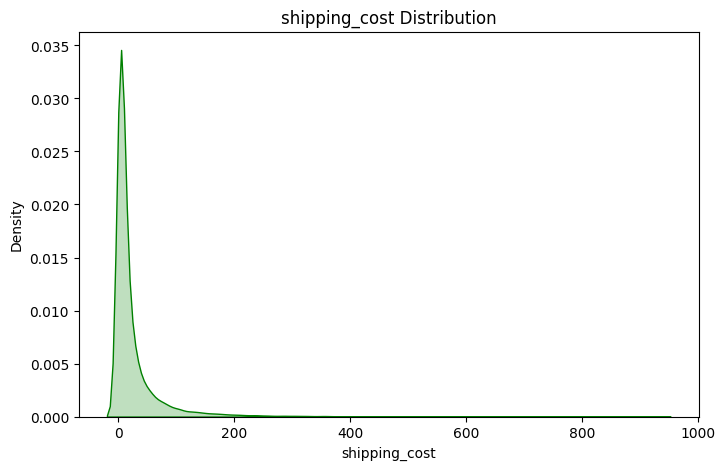

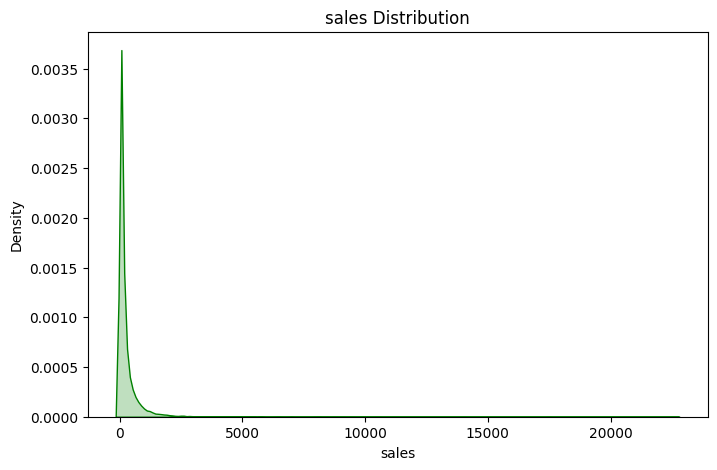

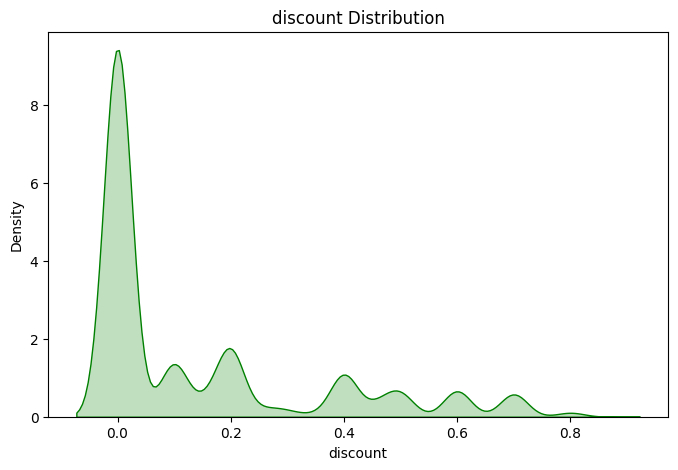

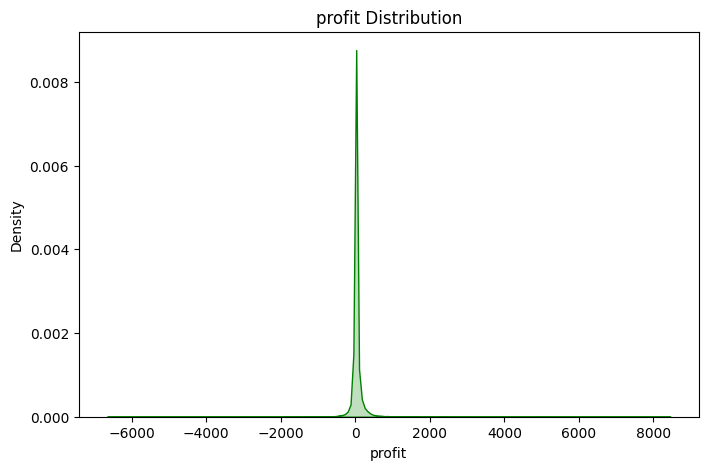

In [85]:
for col in continuous_col:
    plt.figure(figsize=(8,5))
    sns.kdeplot(df[col], fill=True, color="green")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

Discrete column

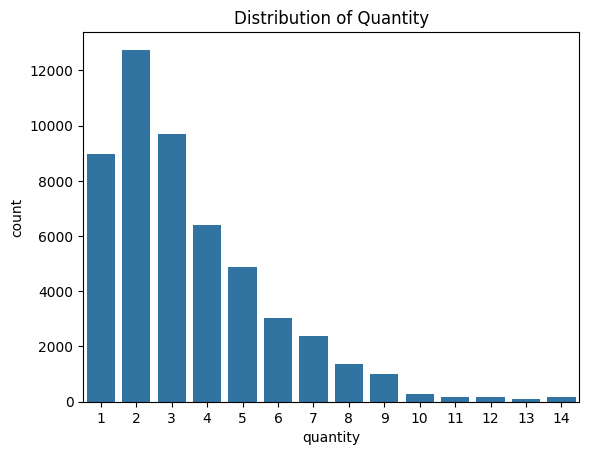

In [86]:
sns.countplot(x="quantity", data=df)
plt.title("Distribution of Quantity")
plt.show()

1. Quantity Distribution
   - Most purchases consist of small quantities
   - the highest frequency is at 2 items per order, followed by 1 item
   - this indicates that customers usually buy in small quantities rather than bulk
2. Sales Distribution:
   - Highly right skewed, with majority of sales concentrated at lower values
3. Profit distribution:
   - Extremely peaked around 0, showing that most transactions generate small margins
4. Shipping cost distribution:
   - Highly right skewed, with most deliveries costing very little
5. Discount distribution
   - Multimodal, with spikes at common discount rates (0,1, 0.2, 0.5)
   - this indicates that discounts are applied in structured tiers rather than randomly

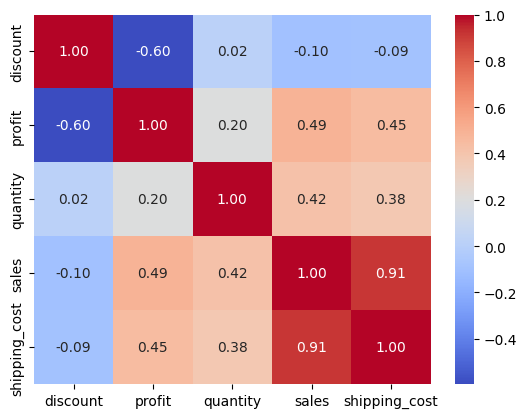

In [87]:
corr = df[numeric_cols].corr(method="spearman")
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Correlation insights (highlighted)
1. Discount vs Profit (-0.6, strong negative correlation)
   - Higher discounts are strongly associated with lower profits (negatively linear)
   - this confirms that aggresive discount strategies can lower profits
2. Sales vs Shipping Cost (0.91, very strong positive correlation)
   - Large sales values are usually accompanied by higher shipping costs
   - this makes sense since larger orders likely involve bulkier or more numerous items
3. Sales vs Profit (0.49, moderate positive correlation)
   - Higher sales tend to bring higher profits, but the correlation is not perfect due to discounts
4. Quantity vs Sales (0.42, moderate positive correlation)
   - Bigger order quantities are generally linked to higher sales
   - However, the relationship is not very strong, meaning high-value sales can also come from small quantities of expensive items

## 7. Correlation between profit & discount

Take a deeper look into the data to uncover more details about the correlation between profit and discount.

In [88]:
df[df["discount"] == df["discount"].max()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
12082,IT-2012-2675422,2012-05-31,2012-06-02,Second Class,Benjamin Farhat,Home Office,Lower Saxony,Germany,EU,Central,...,Furniture,Tables,"Bevis Conference Table, Fully Assembled",555,4,0.85,-1924.542,62.75,High,2012
18023,IT-2012-5588535,2012-11-16,2012-11-21,Standard Class,Mitch Willingham,Corporate,Lower Saxony,Germany,EU,Central,...,Furniture,Tables,"Chromcraft Coffee Table, Fully Assembled",242,6,0.85,-1144.116,23.38,High,2012


In [89]:
df[df["profit"] == df["profit"].max()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
29530,CA-2013-118689,2013-10-03,2013-10-10,Standard Class,Tamara Chand,Corporate,Indiana,United States,US,Central,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17500,5,0.0,8399.976,349.07,Medium,2013


In [90]:
df[df["profit"] == df["profit"].min()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
31884,CA-2013-108196,2013-11-26,2013-12-03,Standard Class,Cindy Stewart,Consumer,Ohio,United States,US,East,...,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4500,5,0.7,-6599.978,451.63,Low,2013


An 85% discount leads to negative profit, and a 70% discount causes the most significant loss in the dataset. On the other hand, orders with no discount drive profits upward, with the maximum recorded profit reaching 8,400.

At this stage, we cannot draw a definitive conclusion, since the observation is based on a limited sample. A deeper analysis supported by visualizations is necessary.

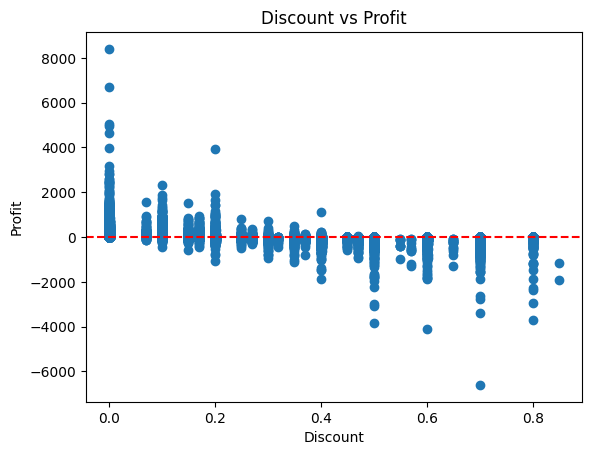

In [91]:
plt.scatter(df["discount"], df["profit"])
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs Profit")
plt.show()

It is evident that as discounts increase, losses grow larger, while smaller discounts are linked to higher profits.

## 8. Time-Based Analysis

We aim to measure the average processing time from order placement to shipment, categorized by order priority.

In [92]:
df["processing_time"] = (df["ship_date"] - df["order_date"]).dt.days

In [93]:
order_priority_stats = df.groupby("order_priority")["processing_time"].describe()
order_priority_stats = order_priority_stats.sort_values(by="mean", ascending=False)
order_priority_stats

,count,mean,std,min,25%,50%,75%,max
order_priority,,,,,,,,
Low,2424.0,6.484736,0.499870,6.0,6.0,6.0,7.0,7.0
Medium,29433.0,4.516529,1.448282,0.0,4.0,5.0,5.0,7.0
High,15501.0,3.085801,1.442307,0.0,2.0,4.0,4.0,5.0
Critical,3932.0,1.806205,1.029991,0.0,1.0,2.0,3.0,3.0


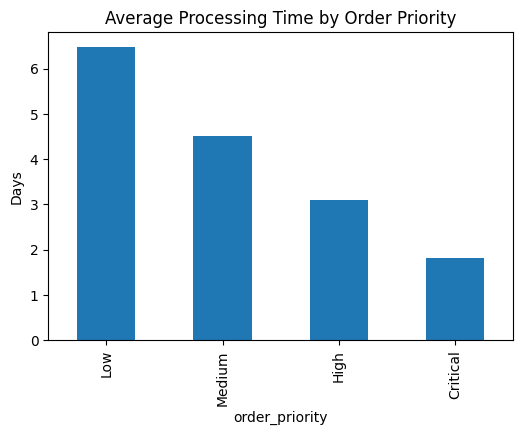

In [97]:
order_priority_mean = df.groupby("order_priority")["processing_time"].mean()
order_priority_mean = order_priority_mean.sort_values(ascending=False)

order_priority_mean.plot(kind="bar", figsize=(6,4))
plt.title("Average Processing Time by Order Priority")
plt.ylabel("Days")
plt.show()

Monthly Sales and Profit Over Time

In [98]:
df["order_date"] = pd.to_datetime(df["order_date"])

sales_monthly = df.resample("M", on="order_date")["sales"].sum()
profit_monthly = df.resample("M", on="order_date")["profit"].sum()

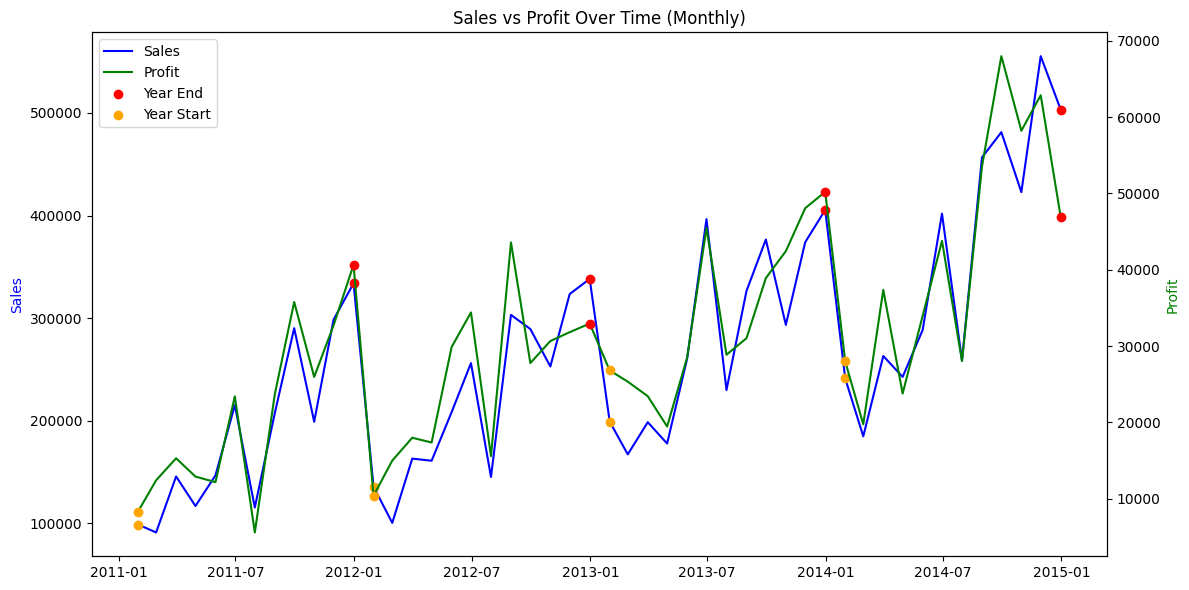

In [99]:
fig, ax1 = plt.subplots(figsize=(12,6))

l1 = ax1.plot(sales_monthly.index, sales_monthly.values, color="blue", label="Sales")
ax1.set_ylabel("Sales", color="blue")

ax2 = ax1.twinx()
l2 = ax2.plot(profit_monthly.index, profit_monthly.values, color="green", label="Profit")
ax2.set_ylabel("Profit", color="green")

year_end = sales_monthly.index[sales_monthly.index.month == 12]
year_start = sales_monthly.index[sales_monthly.index.month == 1]

ax1.scatter(year_end, sales_monthly[year_end], color="red", zorder=5, label="Year End")
ax2.scatter(year_end, profit_monthly[year_end], color="red", zorder=5)

ax1.scatter(year_start, sales_monthly[year_start], color="orange", zorder=5, label="Year Start")
ax2.scatter(year_start, profit_monthly[year_start], color="orange", zorder=5)

lines = l1 + l2
labels = [line.get_label() for line in lines]
ax1.legend(lines + [ax1.collections[0], ax1.collections[1]], 
           labels + ["Year End", "Year Start"], 
           loc="upper left")

plt.title("Sales vs Profit Over Time (Monthly)")
fig.tight_layout()
plt.show()

Insights:

Sales (blue) and Profit (green) both display a steady upward trend from early 2011 through late 2014, showing that sales growth is aligned with profit growth.

The two metrics move closely together: increases in sales are typically followed by increases in profit.

Seasonal fluctuations are clear, with strong year-end spikes driven by consumer demand, and dips at the start of each year as purchasing slows down.

Overall, the positive trend from 2011 to 2014 demonstrates sustained growth in the retail business.'


Source: https://www.confiz.com/blog/best-and-worst-months-for-retail-sales

# Business Question

## 1. How do discounts affect profit margins across categories?

In [100]:
df["discount_bin"] = pd.cut(df["discount"],
                            bins=[0,0.1,0.2,0.3,0.5,0.7,0.9],
                            labels=["0-10%","10-20%","20-30%","30-50%","50-70%","70-90%"])

profit_discount = df.groupby(["category","discount_bin"], observed=False)["profit"].mean().reset_index()

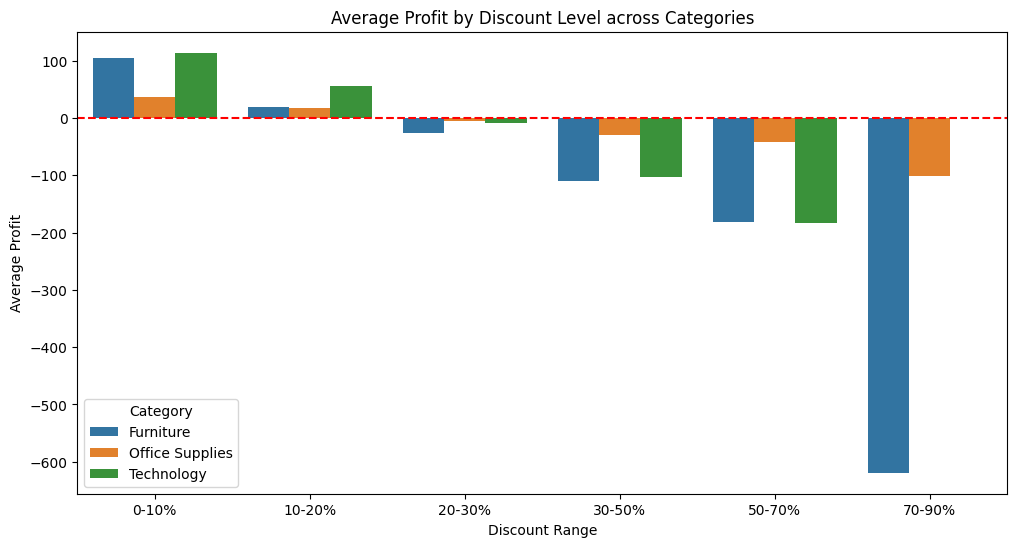

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(x="discount_bin", y="profit", hue="category", data=profit_discount)
plt.axhline(0, color="red", linestyle="--")
plt.title("Average Profit by Discount Level across Categories")
plt.ylabel("Average Profit")
plt.xlabel("Discount Range")
plt.legend(title="Category")
plt.show()

Insight:
The visualization shows that with little to no discount, both Furniture and Technology generate higher profits compared to Office Supplies. However, as discounts increase, Furniture and Technology experience greater losses than Office Supplies. This suggests that Office Supplies are less sensitive to discounts, while Furniture and Technology are more significantly affected.

Overall, the results indicate that higher discounts do not consistently increase profitability. Certain categories, such as Office Supplies, are relatively unaffected, whereas others, like Furniture and Technology, are highly impacted.

Recommendation:
Large discounts should be avoided for Furniture and Technology. Instead, bundling strategies, offering related items at a lower combined price, could attract customers without heavily reducing profit margins. For Office Supplies, applying minimum-purchase discounts could encourage bulk buying while preserving profitability. Discounts greater than 50% should be reserved only for clearance or end-of-life stock.

## 2. Which customer segment generates the most profit?

In [102]:
agg = df.groupby("segment").agg(
    sales=("sales", "sum"),
    profit=("profit", "sum")  
).reset_index()

plot_df = agg.melt(
    id_vars="segment", 
    value_vars=["sales", "profit"],
    var_name="Metric", value_name="Value"
)

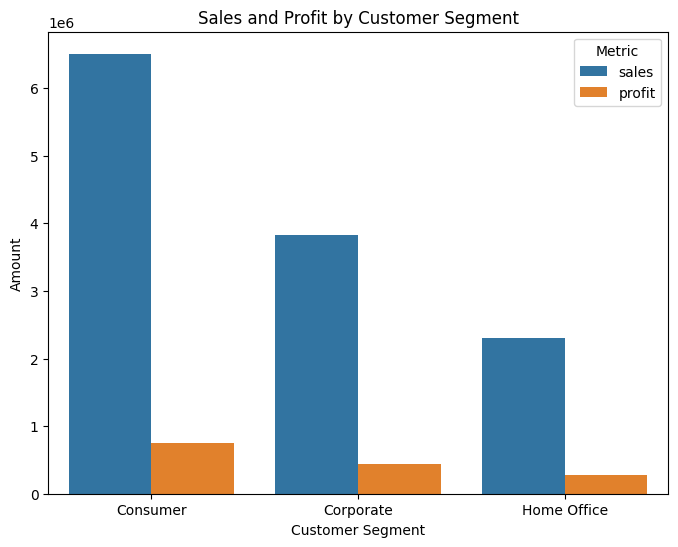

In [103]:
plt.figure(figsize=(8,6))
sns.barplot(data=plot_df, x="segment", y="Value", hue="Metric")

plt.title("Sales and Profit by Customer Segment")
plt.ylabel("Amount")
plt.xlabel("Customer Segment")
plt.legend(title="Metric")
plt.show()

The visualization shows that the Consumer segment contributes the most profit, with Corporate and Home Office trailing behind. Since the Consumer segment also drives the highest sales, it is reasonable that it delivers the largest profit.

To gain deeper insight, we should compute the actual margin ((Profit ÷ Sales) × 100) to evaluate how efficiently each segment generates profit relative to sales.

In [109]:
summary = df.groupby("segment").agg(
    sales=("sales", "sum"),
    profit=("profit", "sum")
).reset_index()

summary["margin"] = (summary["profit"] / summary["sales"]) * 100

summary

,segment,sales,profit,margin
0,Consumer,6508141,749239.78206,11.512347
1,Corporate,3824808,442785.85866,11.576682
2,Home Office,2309956,277009.18056,11.991968


Insights:

- All three segments show very similar margins (~11.5–12%), which suggests pricing and discounting policies are fairly consistent across customer types.
- Consumers drive volume, contributing the highest total profit, but not the highest efficiency.
- Home Office customers, while smaller in size, are the most efficient in terms of margin, making them potentially valuable for targeted growth strategies.

Recommendation:

- Consumer Segment & Corporate Segment: Continue to focus on this segment for overall profit growth, but consider ways to raise its margin slightly
- Home Office Segment: Though small, this segment is highly efficient. Targeted marketing or tailored offers could expand this customer base without sacrificing margin

## 3. How do sales trend vary across global market

In [110]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

sales_trend = df.groupby([pd.Grouper(key="order_date", freq="M"), "market"])["sales"].sum().reset_index()

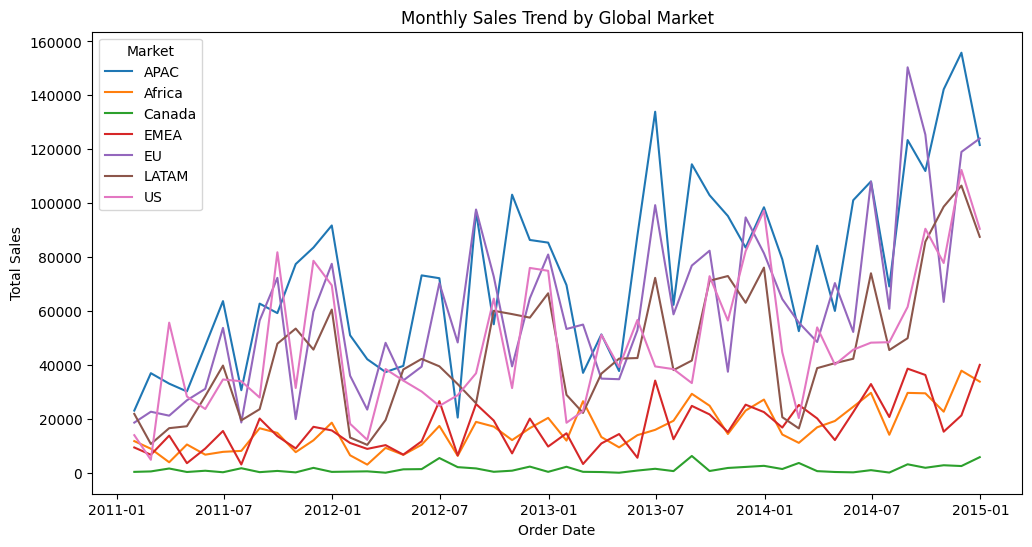

In [113]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trend, x="order_date", y="sales", hue="market")
plt.title("Monthly Sales Trend by Global Market")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.legend(title="Market")
plt.show()

Insights

- APAC & EU: These regions have dominated the market since early 2011. Growth accelerated especially after 2013, with both regions experiencing strong upward trends, leaving other regions behind.

- US: Sales have remained relatively stable from 2011 to early 2015. While there is evidence of growth, it is not as aggressive as in APAC and EU.

- LATAM: Similar to the US, growth has been steady but not very significant. Nevertheless, the overall trend is upward.

- Africa & EMEA: Sales are highly stable with very slow growth. While there is a slight increase over time, their contribution remains far below APAC, EU, US, and LATAM.

- Canada: The smallest market in terms of sales, showing nearly flat performance with minimal contribution.

Seasonality:

There is a recurring seasonal pattern: sales consistently spike in Q4 (year-end), likely driven by holiday season and year-end promotions, followed by a dip at the beginning of the year.

Recommendations

- APAC: Increase investment in marketing and expand distribution channels, as this region shows the strongest potential for profit growth.

- EU & US: Both are already strong markets with steady upward trends. Expansion is still worthwhile to sustain growth, even if it is not as rapid as APAC.

- LATAM: Though smaller than APAC, EU, and US, there is clear growth potential. Stronger promotion and brand presence will be important for future development.

- Africa, EMEA, & Canada: These markets show very slow growth. Focused promotional strategies and prioritization of high-margin products could help maximize profitability despite limited sales contribution.

Note: These insights are based on sales trends only. Sales volume does not necessarily reflect profitability. Therefore, further analysis of profit margins per region is required to validate these recommendations.

In [119]:
market_summary = df.groupby("market").agg(
    sales=("sales", "sum"),
    profit=("profit", "sum")
).reset_index()

plot_df = market_summary.melt(
    id_vars="market", 
    value_vars=["sales", "profit"],
    var_name="Metric", value_name="Value"
)

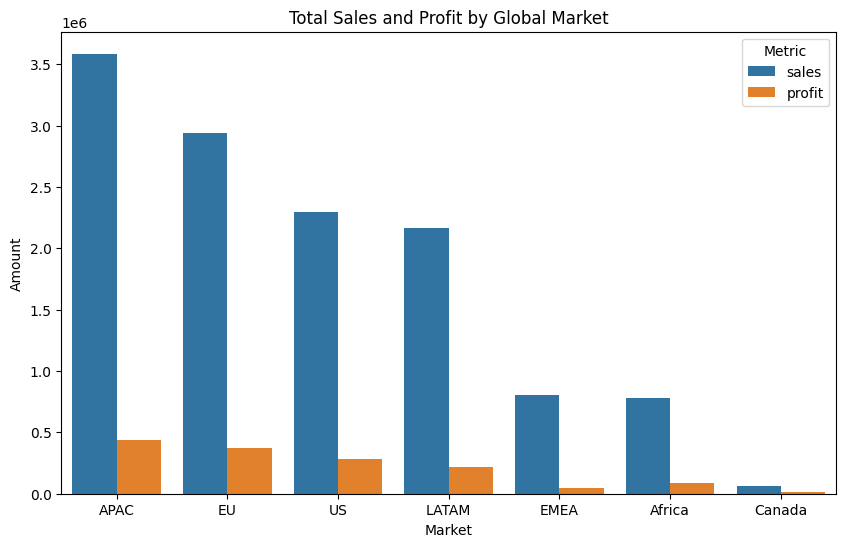

In [121]:
order = market_summary.sort_values("sales", ascending=False)["market"]

plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x="market", y="Value", hue="Metric", order=order)
plt.title("Total Sales and Profit by Global Market")
plt.xlabel("Market")
plt.ylabel("Amount")
plt.legend(title="Metric")
plt.show()

APAC leads in sales, followed by the EU and US, and profits decrease in the same order.

Yet, this profit pattern may be driven by sales frequency rather than true efficiency. To clarify, we should look at the profit margin.

In [122]:
summary = df.groupby("market").agg(
    sales=("sales", "sum"),
    profit=("profit", "sum")
).reset_index()

summary["margin_market"] = (summary["profit"] / summary["sales"]) * 100
summary = summary.sort_values("margin_market", ascending=False).reset_index(drop=True)

summary

,market,sales,profit,margin_market
0,Canada,66932,17817.39000,26.620137
1,EU,2938139,372829.74150,12.689316
2,US,2297354,286397.02170,12.466386
3,APAC,3585833,437577.57900,12.202955
4,Africa,783776,88871.63100,11.338907
5,LATAM,2164687,221643.48708,10.239055
6,EMEA,806184,43897.97100,5.445155


The analysis shows that while Canada contributes the smallest sales volume, it delivers the highest profit margin (26.6%), indicating highly efficient operations despite limited scale. In contrast, EU, US, and APAC dominate in total sales and profit, with margins around 12%, reflecting strong but stable market performance. Other regions like Africa, LATAM, and especially EMEA show relatively lower margins, with EMEA having the weakest profitability at just 5.4%.

Conclusion: Canada demonstrates high efficiency but limited market size, while EU, US, and APAC remain the primary revenue drivers. Future strategies should focus on scaling in high-margin regions like Canada while optimizing cost structures in lower-margin markets such as EMEA.

## 4. Which sub-categories are consistently loss-making?

In [138]:
summary_sub = df.groupby("sub_category").agg(
    sales=("sales", "sum"),
    profit=("profit", "sum")
).reset_index()

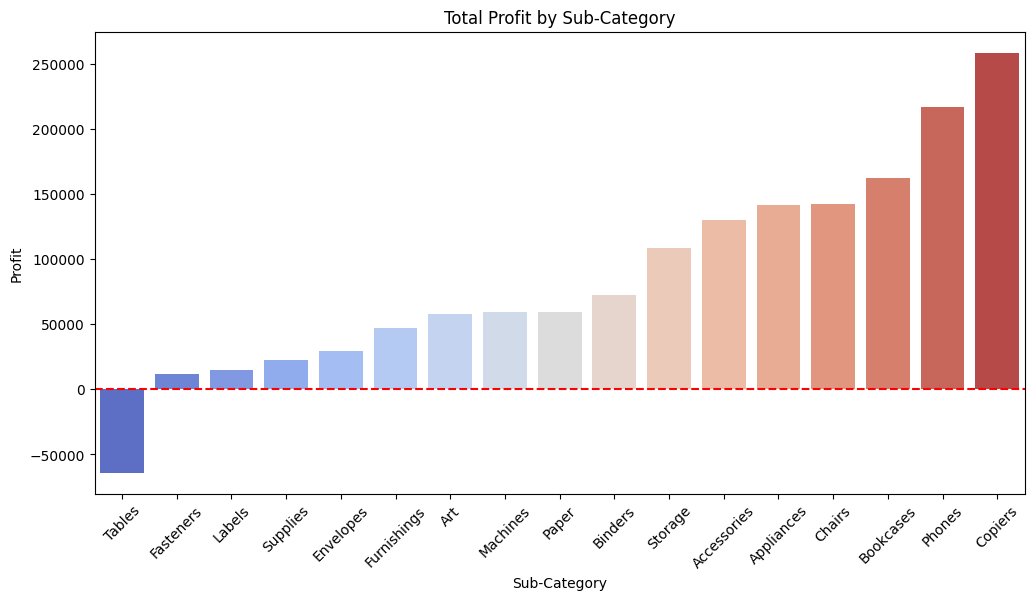

In [143]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=summary_sub.sort_values("profit"),
    x="sub_category",
    y="profit",
    hue="sub_category",   
    dodge=False,          
    palette="coolwarm",
    legend=False        
)
plt.axhline(0, color="red", linestyle="--")
plt.title("Total Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

In [145]:
summary_sub = df.groupby("sub_category").agg(
    sales=("sales", "sum"),
    profit=("profit", "sum")
).reset_index()

summary_sub["margin"] = (summary_sub["profit"] / summary_sub["sales"]) * 100

summary_sub = summary_sub.sort_values("margin")

summary_sub

,sub_category,sales,profit,margin
16,Tables,757034,-64083.38870,-8.465061
11,Machines,779071,58867.87300,7.556163
15,Supplies,243090,22583.26310,9.290083
5,Chairs,1501682,141973.79750,9.454318
14,Storage,1127124,108461.48980,9.622853
4,Bookcases,1466559,161924.41950,11.041112
9,Furnishings,385609,46967.42550,12.180065
13,Phones,1706874,216717.00580,12.696720
8,Fasteners,83254,11525.42410,13.843688
1,Appliances,1011081,141680.58940,14.012783


Insights:

The margin analysis by sub-category highlights that Tables are the only consistently loss-making category (–8.5%), driven by high discounting and shipping costs. In contrast, sub-categories such as Envelopes (17.3%), Labels (20.4%), and Paper (24.2%) emerge as strong profit drivers, combining healthy sales with high margins. Meanwhile, mid-range categories like Chairs, Storage, and Bookcases provide stability but are not as profitable. This indicates that loss-making sub-categories need urgent cost and pricing review, while high-margin sub-categories should be leveraged as key growth drivers.

Recommendation:

The company should re-evaluate pricing and logistics strategies for Tables, possibly limiting deep discounts or implementing flat shipping fees to reduce losses. For low-margin sub-categories like Supplies and Machines, cross-selling with high-margin items or optimizing operations could help improve profitability. At the same time, greater marketing focus and resource allocation should be directed to Envelopes, Labels, and Paper, as they consistently deliver strong returns and can drive long-term business growth.

## 5. How do shipping costs relate to order value and profit?

Since our previous analysis revealed a strong correlation between shipping costs and sales (correlation coefficient ≈ 0.91), it becomes essential to further examine how shipping expenses relate not only to order value but also to overall profitability

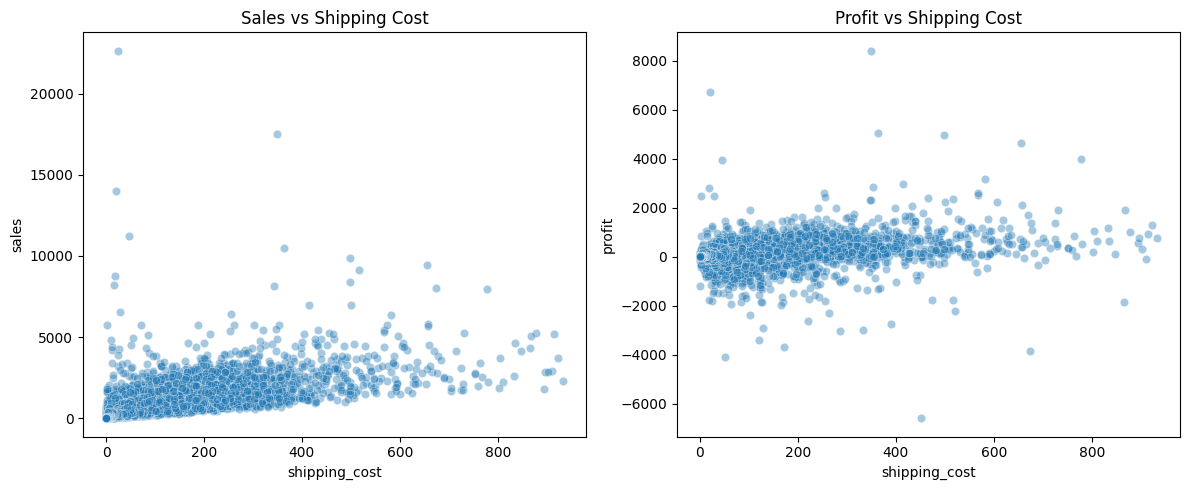

In [148]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x="shipping_cost", y="sales", alpha=0.4)
plt.title("Sales vs Shipping Cost")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="shipping_cost", y="profit", alpha=0.4)
plt.title("Profit vs Shipping Cost")

plt.tight_layout()
plt.show()

In [149]:
df["shipping_bin"] = pd.qcut(df["shipping_cost"], q=3, labels=["Low", "Medium", "High"])

summary_ship = df.groupby("shipping_bin").agg(
    avg_sales=("sales", "mean"),
    avg_profit=("profit", "mean")
).reset_index()

summary_ship

,shipping_bin,avg_sales,avg_profit
0,Low,30.871712,1.484655
1,Medium,107.117633,8.837467
2,High,601.671503,75.623154


In [157]:
plot = summary_ship.melt(
    id_vars="shipping_bin", 
    value_vars=["avg_sales", "avg_profit"],
    var_name="Metric", value_name="Value"
)

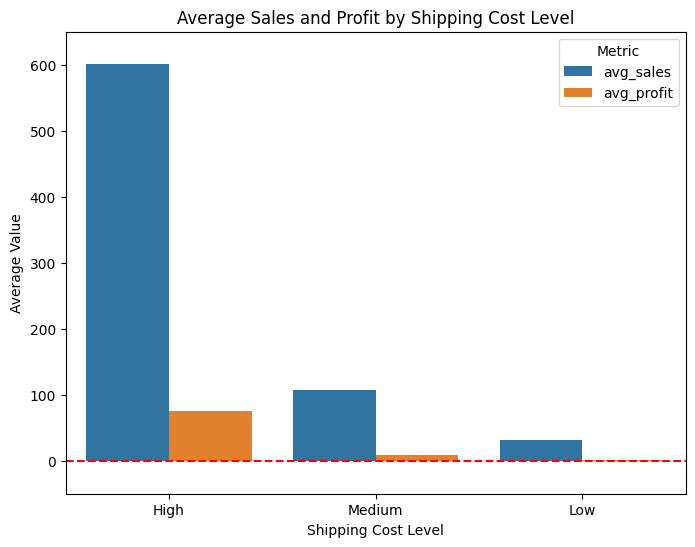

In [160]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=plot, 
    x="shipping_bin", 
    y="Value", 
    hue="Metric", 
    order=order
)
plt.title("Average Sales and Profit by Shipping Cost Level")
plt.xlabel("Shipping Cost Level")
plt.ylabel("Average Value")
plt.ylim(-50, 650)  
plt.axhline(0, color="red", linestyle="--") 
plt.show()

Insights:

The scatterplots show a positive correlation between shipping costs and sales values, confirming that higher-value orders tend to incur higher shipping expenses. However, the relationship between shipping cost and profit is less clear, with a wide spread of both positive and negative profits across all shipping cost ranges. The aggregated analysis by shipping cost bins (Low, Medium, High) highlights that while high shipping costs are associated with significantly higher average sales (601) and profits (75), low-cost shipments generate very small order values (31) and almost negligible profits (1.5). This suggests that high shipping costs are tied to larger, more profitable orders, whereas low-cost shipments add minimal value to overall profitability.

Recommendation:

- Optimize low-value shipments: Since low shipping cost orders contribute little profit, the company should encourage customers to increase basket size (e.g., free shipping thresholds, bundle discounts).

- Monitor high-cost shipments: Even though high shipping cost orders generate more profit, the wide variance in profit at these levels indicates potential inefficiencies. Explore options such as volume-based discounts to control costs.

- Segment shipping strategies: Tailor shipping promotions by order value segment (e.g., free standard shipping for medium-value orders, premium options for high-value customers). This ensures profitability is maintained while keeping customer satisfaction high.